/tmp/ipython-input-3-715972373.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start='2023-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-715972373.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = [1 if data['SMA50'].iloc[i] > data['SMA200'].iloc[i] else 0 for i in range(50, len(data))]


Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2024-12-16  250.435883  250.775076  247.054041  247.393234   51694800   
2024-12-17  252.869995  253.219159  249.178902  249.478183   51356400   
2024-12-18  247.453079  253.668083  247.143828  251.553189   56774100   
2024-12-19  249.188889  251.393577  246.495389  246.904406   60882300   
2024-12-20  253.877594  254.386361  245.098768  247.443103  147495300   
2024-12-23  254.655716  255.034791  252.840088  254.156919   40858800   
2024-12-24  257.578674  257.588630  254.675658  254.875189   23234700   
2024-12-26  258.396667  259.474086  257.010028  257.568678   27237100   
2024-12-27  254.974930  258.077462  252.451019  257.209530   42355300   
2024-12-30  251.593079  252.889953  250.146571  251.623005   35557500   

Price            SMA50      SMA200 Signal Position

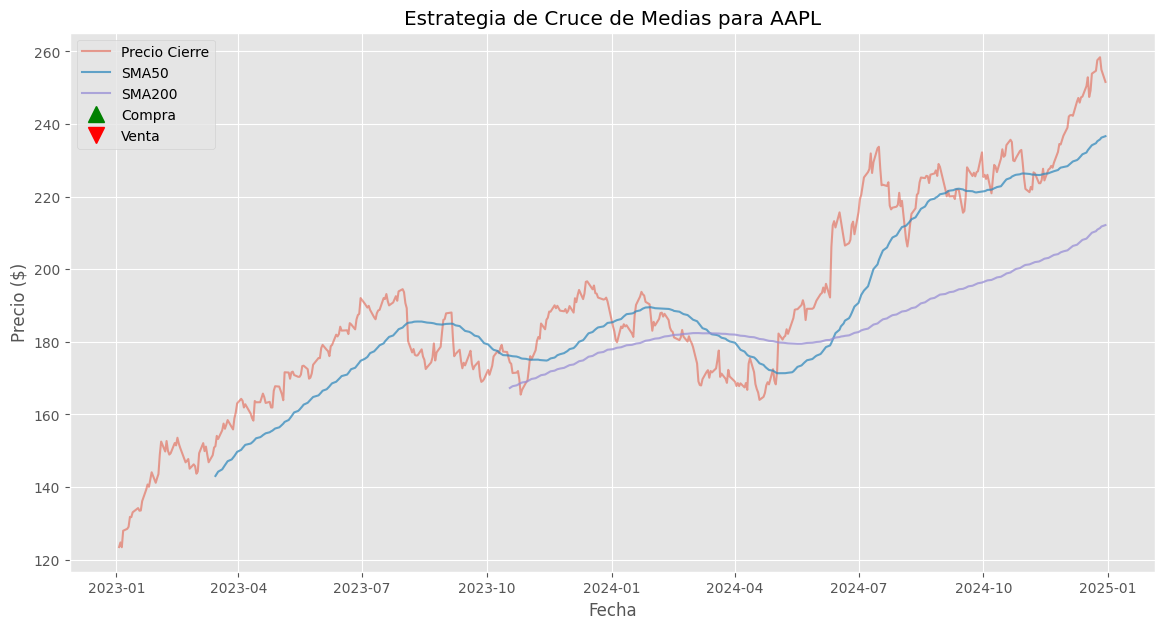

In [ ]:
# Instalar librerías necesarias
!pip install yfinance matplotlib --quiet

# Importar librerías
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de gráfico: usar un estilo compatible
plt.style.use('ggplot')  # 'seaborn' fue reemplazado por este estilo en algunas versiones

# Descargar datos históricos (ejemplo: Apple)
symbol = 'AAPL'
data = yf.download(symbol, start='2023-01-01', end='2024-12-31')

# Calcular medias móviles
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Crear señales de compra y venta
data['Signal'] = 0
data['Signal'][50:] = [1 if data['SMA50'].iloc[i] > data['SMA200'].iloc[i] else 0 for i in range(50, len(data))]
data['Position'] = data['Signal'].diff()

# Mostrar tabla final
print(data.tail(10))

# Graficar la estrategia
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Precio Cierre', alpha=0.5)
plt.plot(data['SMA50'], label='SMA50', alpha=0.75)
plt.plot(data['SMA200'], label='SMA200', alpha=0.75)
plt.plot(data[data['Position'] == 1].index,
         data['SMA50'][data['Position'] == 1],
         '^', markersize=12, color='g', label='Compra')
plt.plot(data[data['Position'] == -1].index,
         data['SMA50'][data['Position'] == -1],
         'v', markersize=12, color='r', label='Venta')
plt.title(f'Estrategia de Cruce de Medias para {symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()
